# Lecture notes from week 5
Programming for the Behavioral Sciences

An introduction to PsychoPy

In [3]:
from psychopy import visual, core, event
import numpy as np

### Example 1
Create a window, and remove it after 1 s

In [3]:
win = visual.Window()
core.wait(1)
win.close()

4.5486 	ERROR 	avbin.dll failed to load. Try importing psychopy.visual
  as the first library (before anything that uses scipy)
  and make sure that avbin is installed.
4.6202 	WARNING 	Monitor specification not found. Creating a temporary one...


### Example 2
A slightly more advanced example, where
 - A window is opened
 - A circle is shown until the participant presses any key

In [7]:
# Create a window and a circle
win = visual.Window() 
circle = visual.Circle(win, radius=0.1)

# Show the circle until keypress
circle.draw()
win.flip()
event.waitKeys()

# Close the window
win.close()

90099.3840 	WARNING 	Monitor specification not found. Creating a temporary one...


### Example 3 - Reaction time test
Press space as soon as you circle appears. Reaction times are stored.

In [6]:
# Parameters in the experiment
nTrials = 5
reaction_times = []

# Create a window and the circle
win = visual.Window() 
circle = visual.Circle(win, radius=0.1)

# Run the trials
for t in np.arange(nTrials):
    
    # Show an empty screen for 1 second
    win.flip()
    core.wait(1)
    
    # Show the circle until keypress  
    circle.draw()
    win.flip()
    keypressed = False
    t0 = core.getTime()
    while not keypressed:  
        k = event.getKeys()
        if k:
            reaction_times.append(core.getTime() - t0)
            break

# Close the window
win.close()
print(np.array(reaction_times) * 1000) # in ms

226.6021 	WARNING 	Monitor specification not found. Creating a temporary one...
[ 474.99505166  394.92946459  408.68613264  497.09427774  559.71820041]


### Question from class
How fast is one loop in  while/for loop?

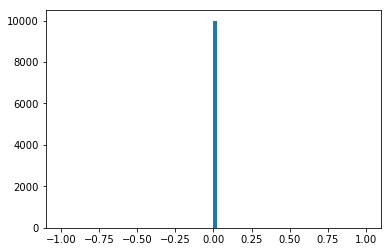

0.30 17.32


In [17]:
import time
import matplotlib.pyplot as plt

# Run nLoops iterations
nLoops = 10000

loop_times = []
for i in range(nLoops):
    loop_times.append(time.time())
    
# The difference between two values are the loop-times (in microseconds)
loop_dur = np.diff(loop_times) * 1000000 

# Plot the results as a histogram (in milliseconds). Set the axis to [-1, +1] ms
plt.hist(loop_dur, bins=100, range = (-1, 1))
plt.show()    

# Compute the M \pm SD of loop-time
print('%.2f %.2f' % (np.mean(loop_dur), np.std(loop_dur)))

Conclusion: The loop times are tiny; on average they are less than 1 microsecond.